In [7]:
import scipy.io
import numpy as np
import tensorflow as tf
import time
import os
from pyDOE import lhs
import matplotlib.pyplot as plt

eqnPath = 'DataGenerator'
path = os.path.join(eqnPath, 'amp_0alpha_4.85')
data = scipy.io.loadmat(path)

    # Flatten makes [[]] into [], [:,None] makes it a column vector
t = data['t'].flatten()[:,None] # T x 1
x = data['x'].flatten()[:,None] # N x 1

    # Keeping the 2D data for the solution data (real() is maybe to make it float by default, in case of zeroes)
Exact_u = np.real(data['u']).T # T x N

In [8]:
    # Meshing x and t in 2D (256,100)
X, T = np.meshgrid(x,t)

    # Preparing the inputs x and t (meshed as X, T) for predictions in one single array, as X_star
X_star = np.hstack((X.flatten()[:,None], T.flatten()[:,None]))

    # Preparing the testing u_star
u_star = Exact_u.flatten()[:,None]

In [9]:
X_star.shape

(1086957, 2)

In [27]:
lb = X_star.min(axis=0)
ub = X_star.max(axis=0) 

In [28]:
# Getting the initial conditions (t=0)
xx1 = np.hstack((X[0:1,:].T, T[0:1,:].T))
uu1 = Exact_u[0:1,:].T

In [29]:
    # Getting the lowest boundary conditions (x=-1) 
xx2 = np.hstack((X[:,0:1], T[:,0:1]))
uu2 = Exact_u[:,0:1]
xx3 = np.hstack((X[:,-1:], T[:,-1:]))
uu3 = Exact_u[:,-1:]

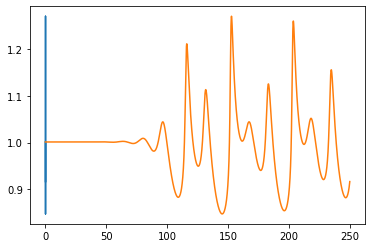

In [30]:
plt.plot(xx3,uu3)

In [8]:
from pyDOE import lhs
X_f_train = lb + (ub-lb)*lhs(2, 10)

In [111]:
from scipy.stats.distributions import norm
means = [0]
stdvs = [0.1]
X_f_train[:, 0] = norm(loc=means[0], scale=stdvs[0]).ppf(X_f_train[:, 0])

In [164]:
from numpy.random import rand
xtr=np.random.normal(-2,0.5,10)

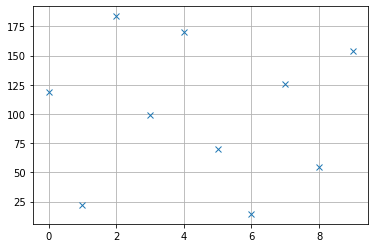

In [14]:
plt.plot(X_f_train[:, 1],'x')
#plt.ylim([-10,5])
plt.grid()

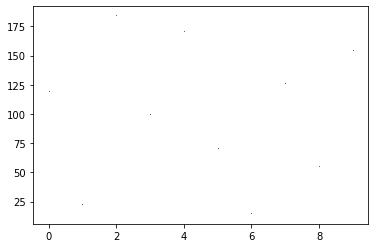

In [15]:
plt.plot(X_f_train[:,1:2],',')

In [18]:
X_f_train[:, 0:1]

array([[-4.67784147],
       [-2.75116736],
       [-2.81045686],
       ...,
       [-6.07243689],
       [-3.47927076],
       [-3.79885983]])

In [7]:
X_u_train = np.vstack([xx1, xx2, xx3])
u_train = np.vstack([uu1, uu2, uu3])

In [10]:
idx = np.random.choice(X_u_train.shape[0], 2500, replace=False)
    # Getting the corresponding X_u_train (which is now scarce boundary/initial coordinates)
X_u_train = X_u_train[idx,:]
    # Getting the corresponding u_train
u_train = u_train [idx,:]

In [8]:
X_u_train.shape[0]

8595

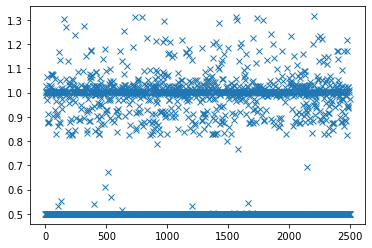

In [12]:
plt.plot(u_train[:,0],'x')


In [13]:
import tensorflow as tf
x_f=X_f_train[:, 0:1]
t_f=X_f_train[:, 1:2]
bc=np.zeros_like(x_f)
X_f = tf.stack([x_f[:, 0], t_f[:, 0]], axis=1)
U_s = tf.stack([bc[:,0], t_f[:, 0]], axis=1)

In [11]:
14656/1087785 

0.013473250688325358

In [12]:
0.013473250688325358*1086957

14644.844148430066